In [20]:
#import library
from  Myfunc import *
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [3]:
#configure
plt.rcParams['figure.figsize'] = (16,12)
plt.rcParams['figure.dpi'] = 200

In [4]:
#Load datasets
df = pd.read_csv('./data/DailyTemps.csv', index_col = 'DATE', parse_dates = True)
df = df.dropna()

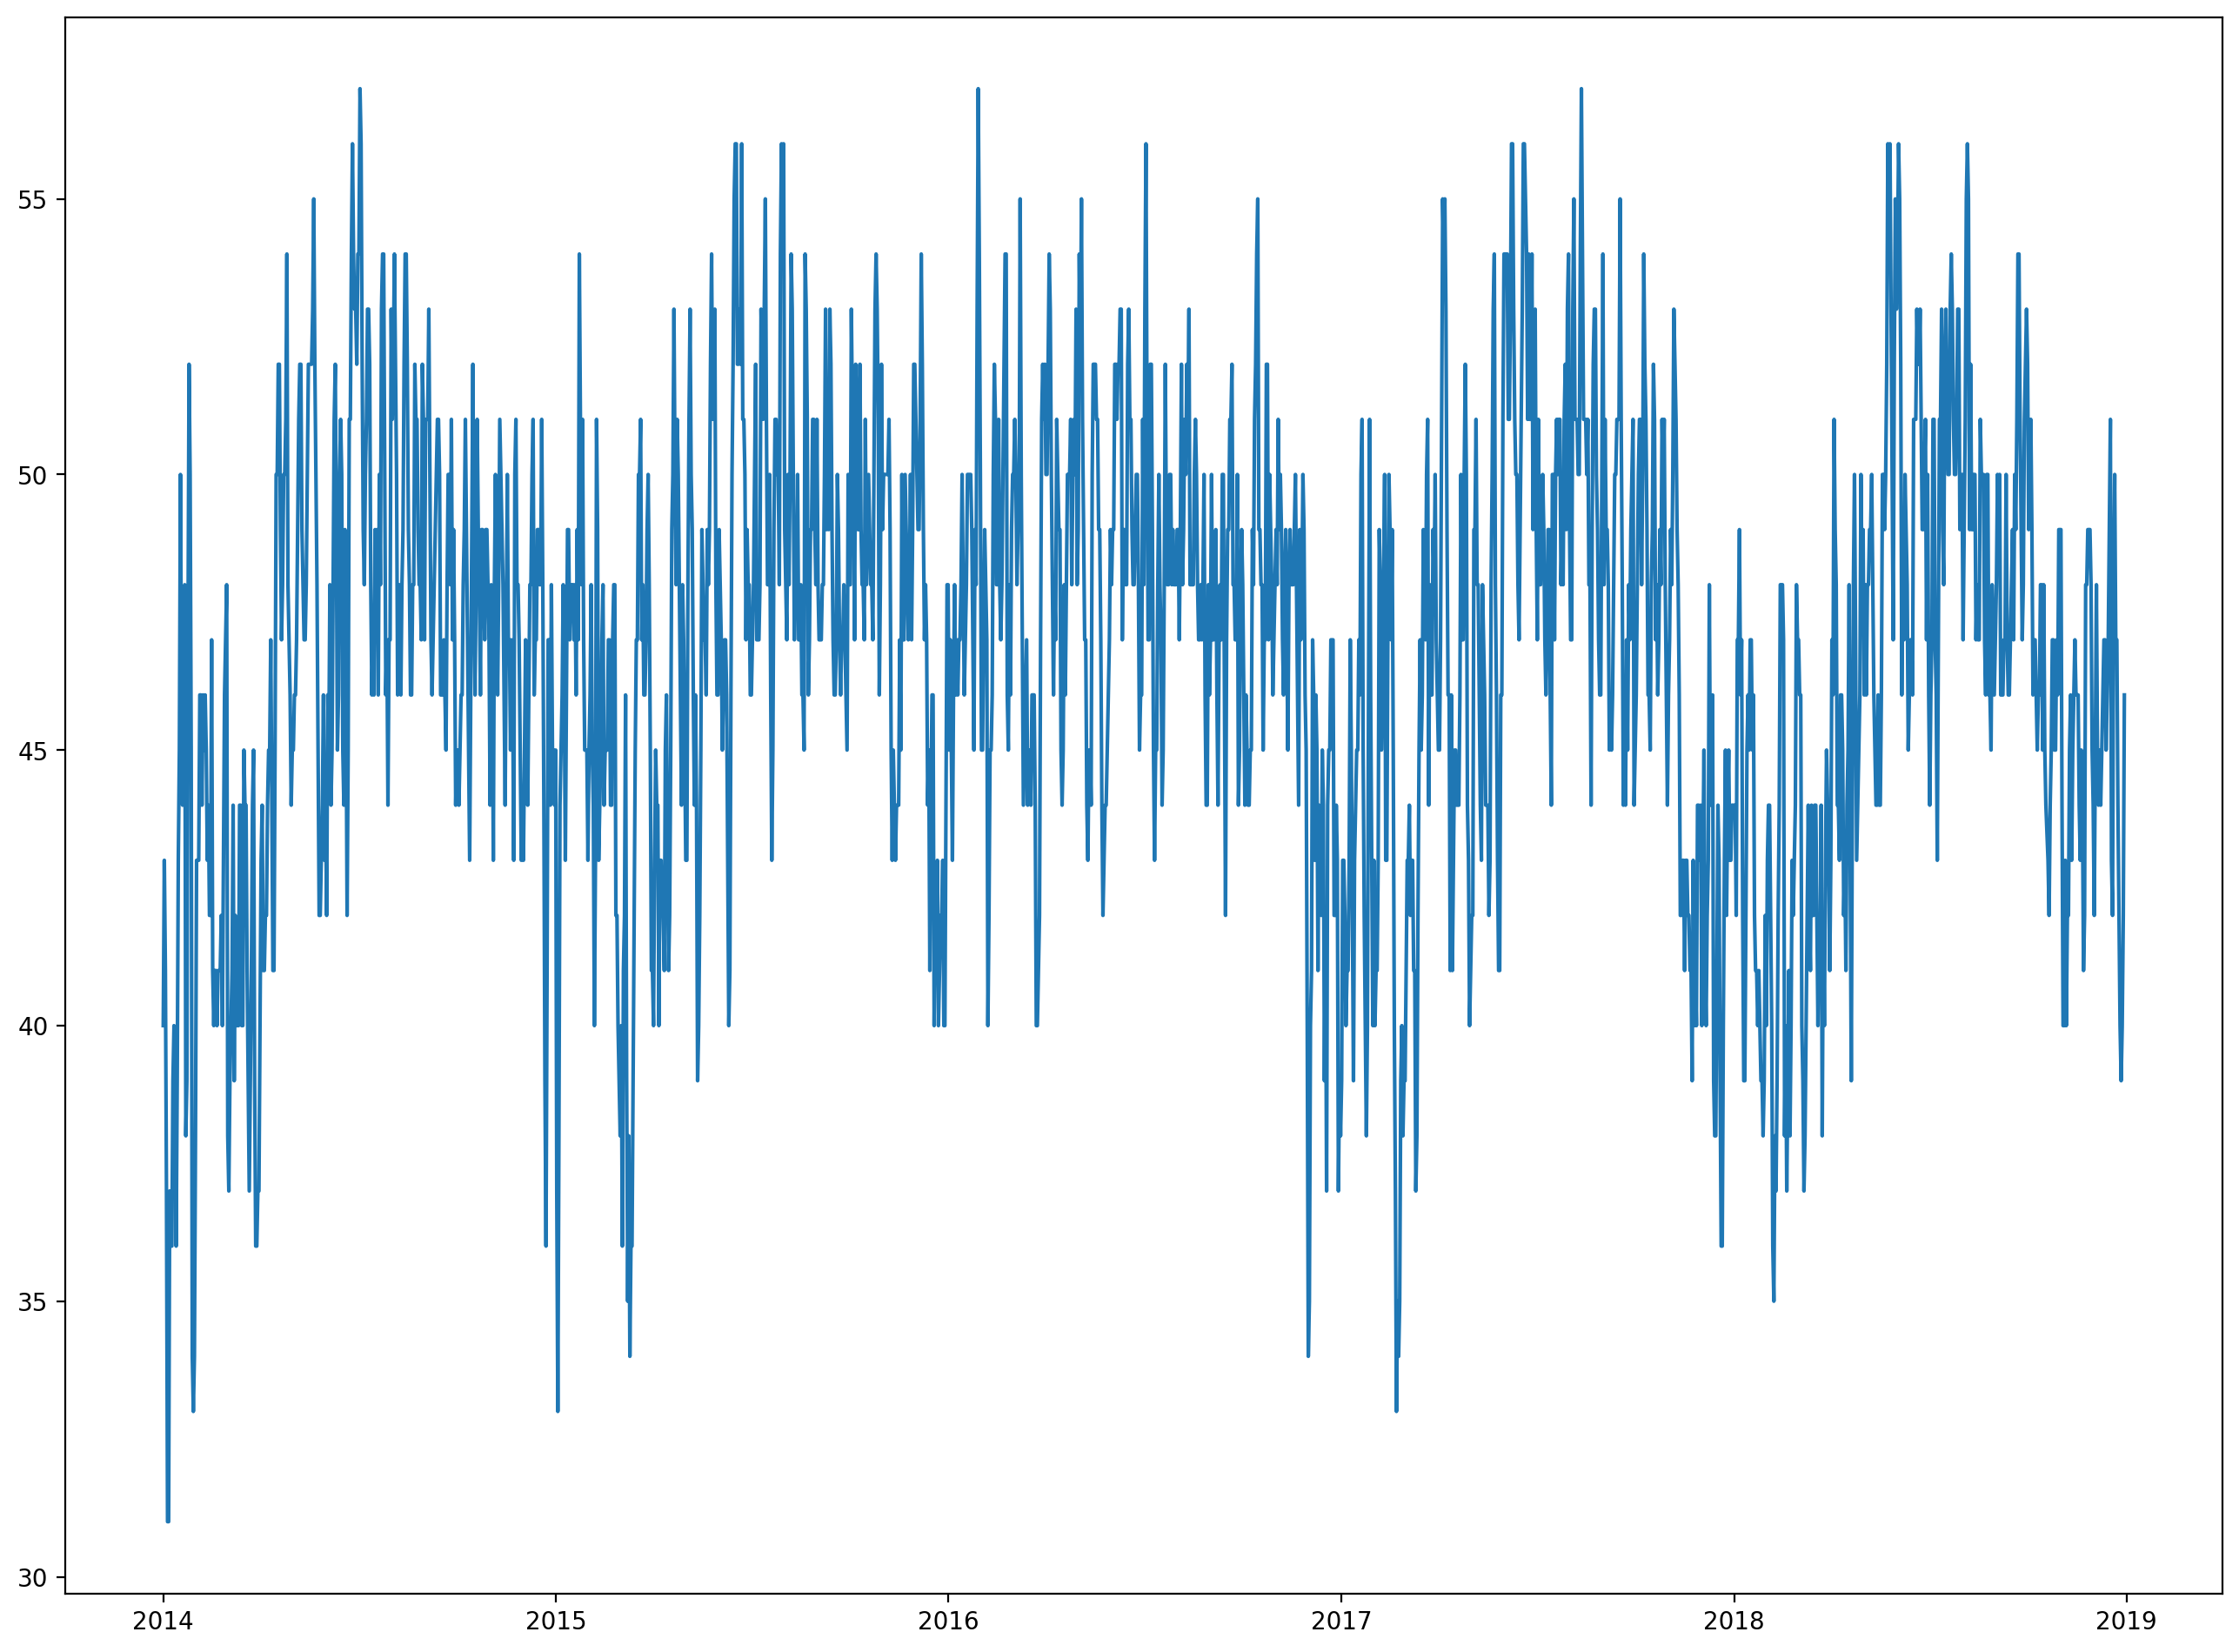

In [5]:
plt.plot(df['AvgTemp'])

In [6]:
adf_test(df['AvgTemp'])

ADF test:             -6.554680e+00
p value                8.675937e-09
# of Lags              1.200000e+01
# of Observations      1.808000e+03
Critical value(1%)    -3.433972e+00
Critical value(5%)    -2.863140e+00
Critical value(10%)   -2.567622e+00
dtype: float64

In [7]:
kpss_test(df['AvgTemp'])

KPSS test:               0.171508
p value                  0.100000
# of Lags               25.000000
Critical value(10%)      0.347000
Critical value(5%)       0.463000
Critical value(2.5%)     0.574000
Critical value(1%)       0.739000
dtype: float64

In [13]:
#Finding p,q parameters
steps = auto_arima (df['AvgTemp'])

In [14]:
train = df.iloc[:-50]
test = df.iloc[-50:]

In [21]:
model = ARIMA(train['AvgTemp'], order = (1,0,5))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1771
Model:                     ARMA(1, 5)   Log Likelihood               -4028.282
Method:                       css-mle   S.D. of innovations              2.352
Date:                Thu, 05 Aug 2021   AIC                           8072.565
Time:                        15:22:07   BIC                           8116.399
Sample:                             0   HQIC                          8088.759
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5692      0.798     58.376      0.000      45.006      48.133
ar.L1.AvgTemp     0.9857      0.007    150.560      0.000       0.973       0.999
ma.L1.AvgTemp    -0.1411      0.025     -5.704      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2241      0.025     -9.139      0.000      -0.272      -0.176
ma.L3.AvgTemp    -0.2177      0.026     -8.454      0.000      -0.268      -0.167
ma.L4.AvgTemp    -0.1491      0.024     -6.309      0.000      -0.195      -0.103
ma.L5.AvgTemp    -0.0596      0.025     -2.409      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0145           +0.0000j            1.0145            0.0000
MA.1            1.0884           -0.0000j            1.0884           -0.0000
MA.2            0.0520           -1.8360j            1.8368           -0.2455
MA.3            0.0520           +1.8360j            1.8368            0.2455
MA.4           -1.8465           -1.0761j            2.1372           -0.4160
MA.5           -1.8465           +1.0761j            2.1372            0.4160
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='DATE'>

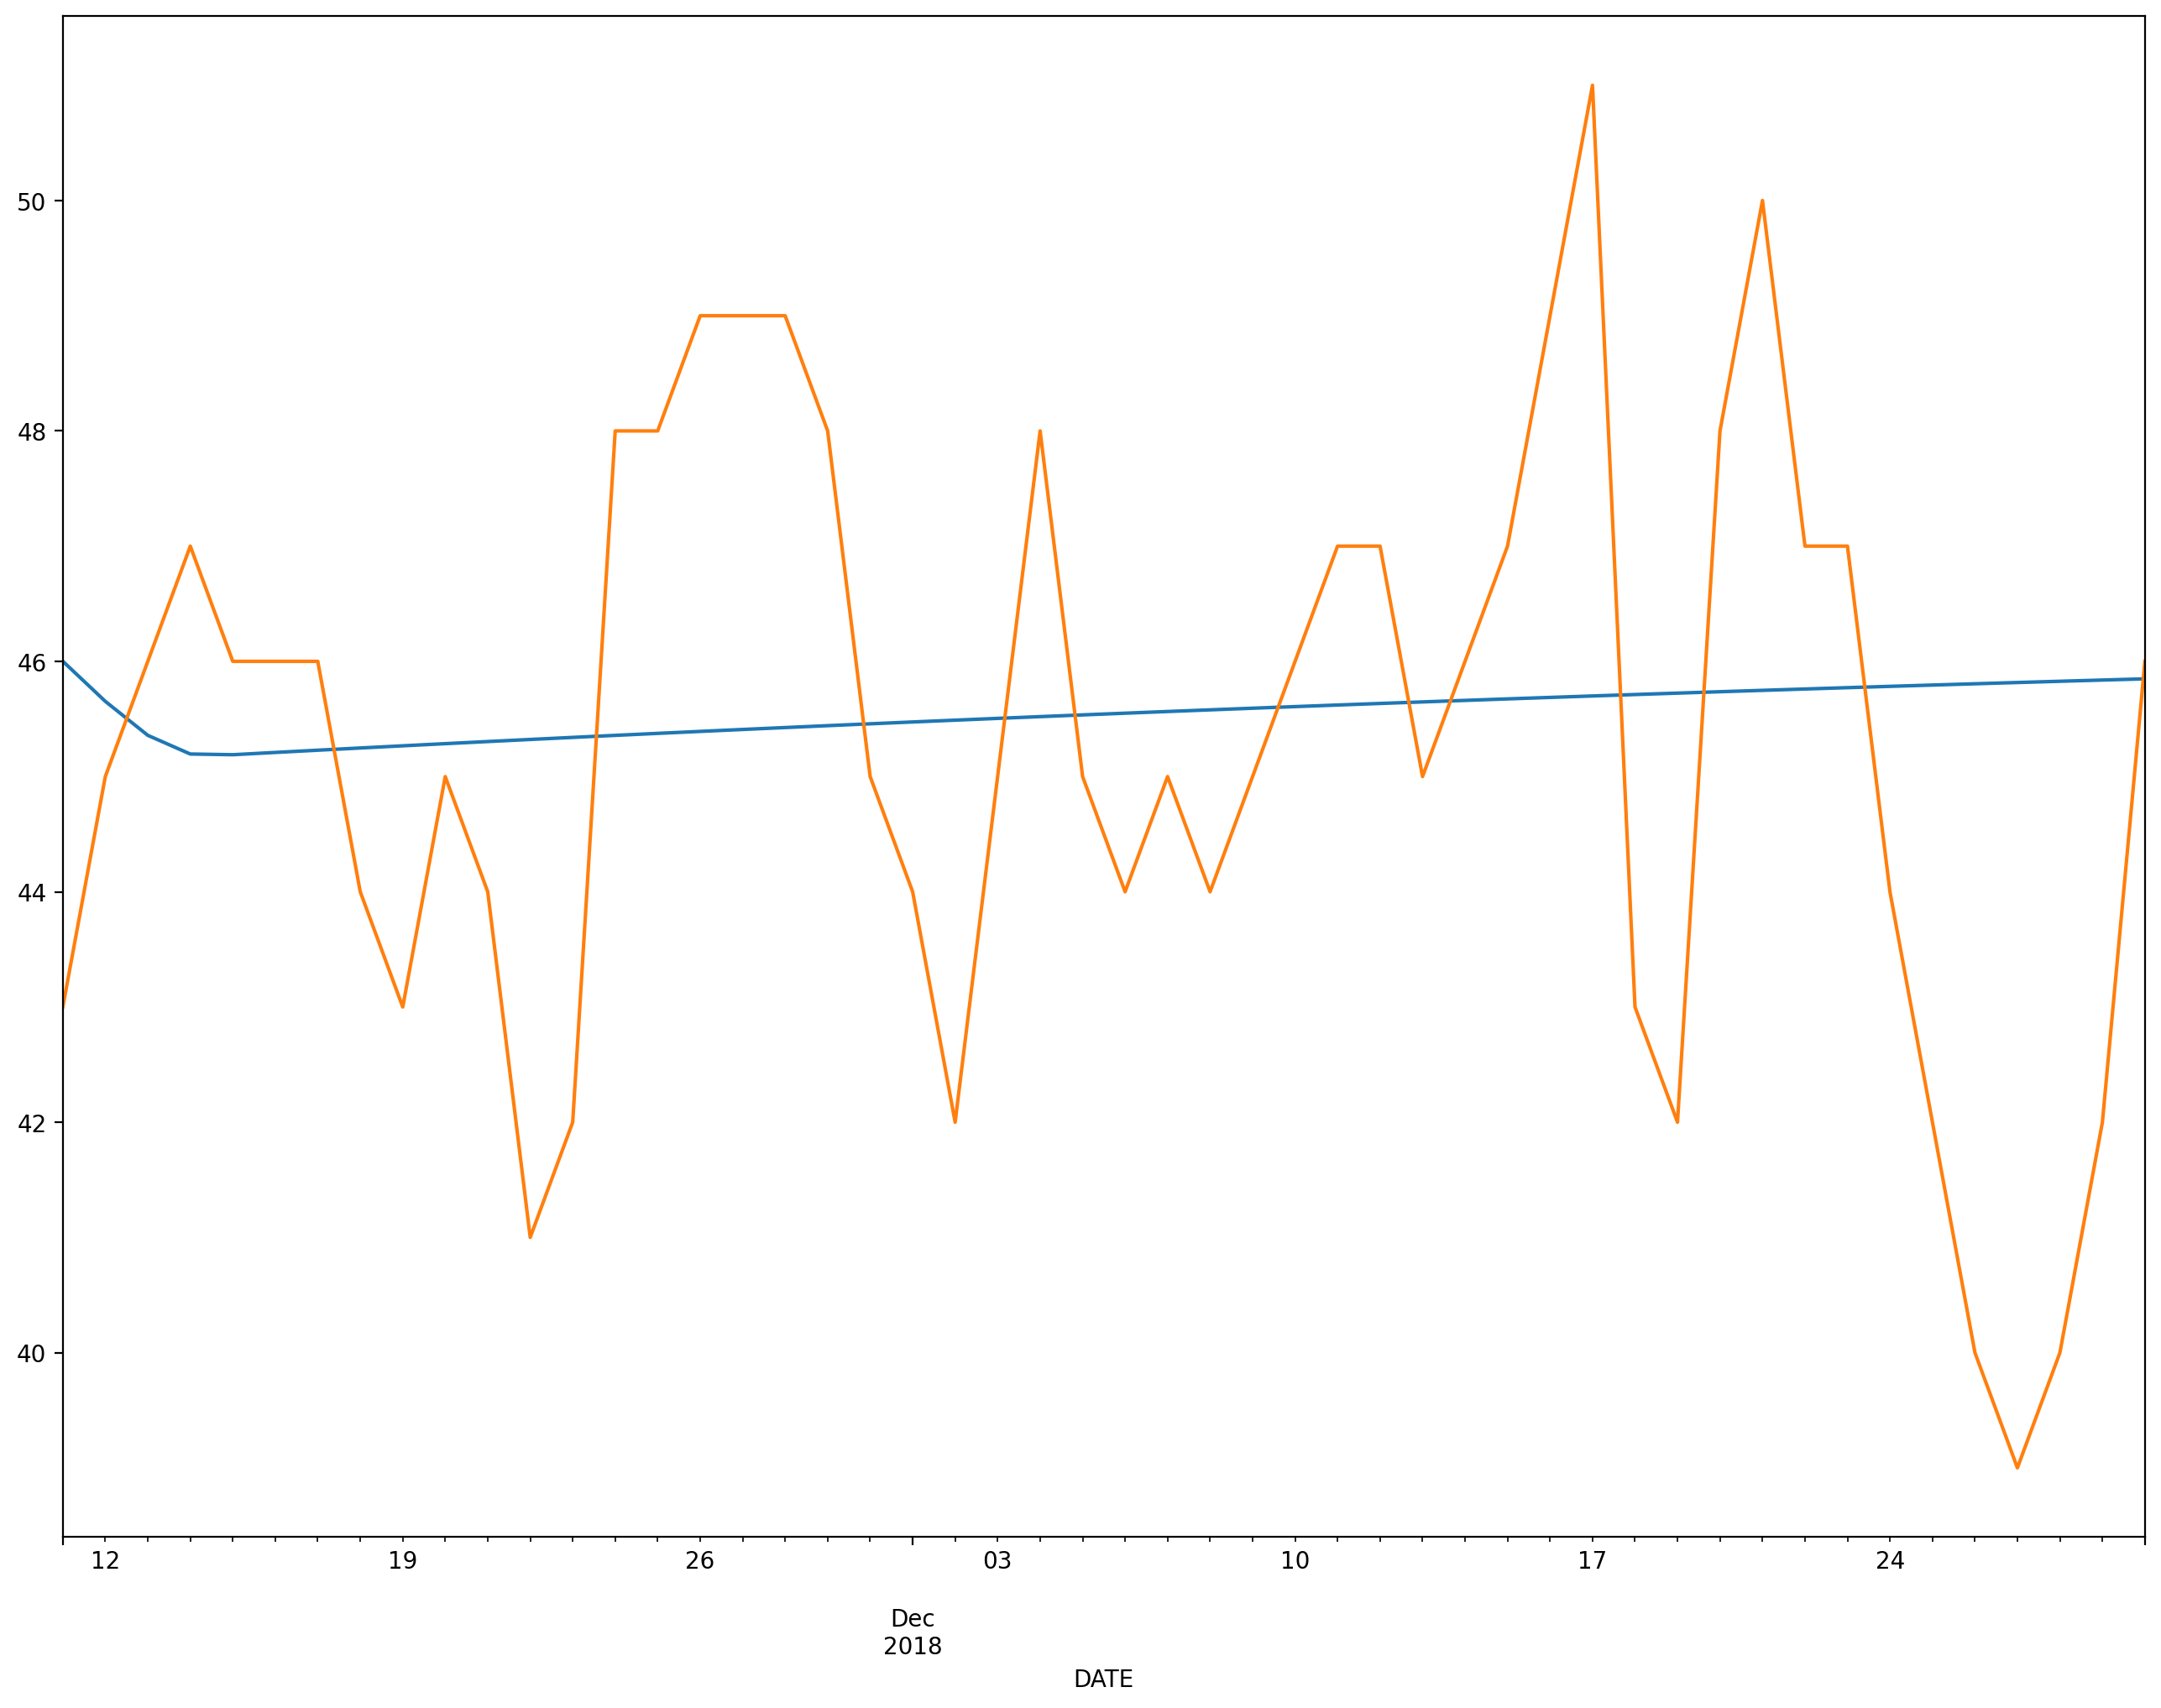

In [23]:
pred_values = model_fitted.predict(start = len(train), end = len(df)-1)
pred_values.index = df.index[len(train):len(df)]
pred_values.plot()
test['AvgTemp'].plot()

In [27]:
#Train ARIMA model with all datasets
model_all = ARIMA(df['AvgTemp'], order = (1,0,5)).fit()

<AxesSubplot:>

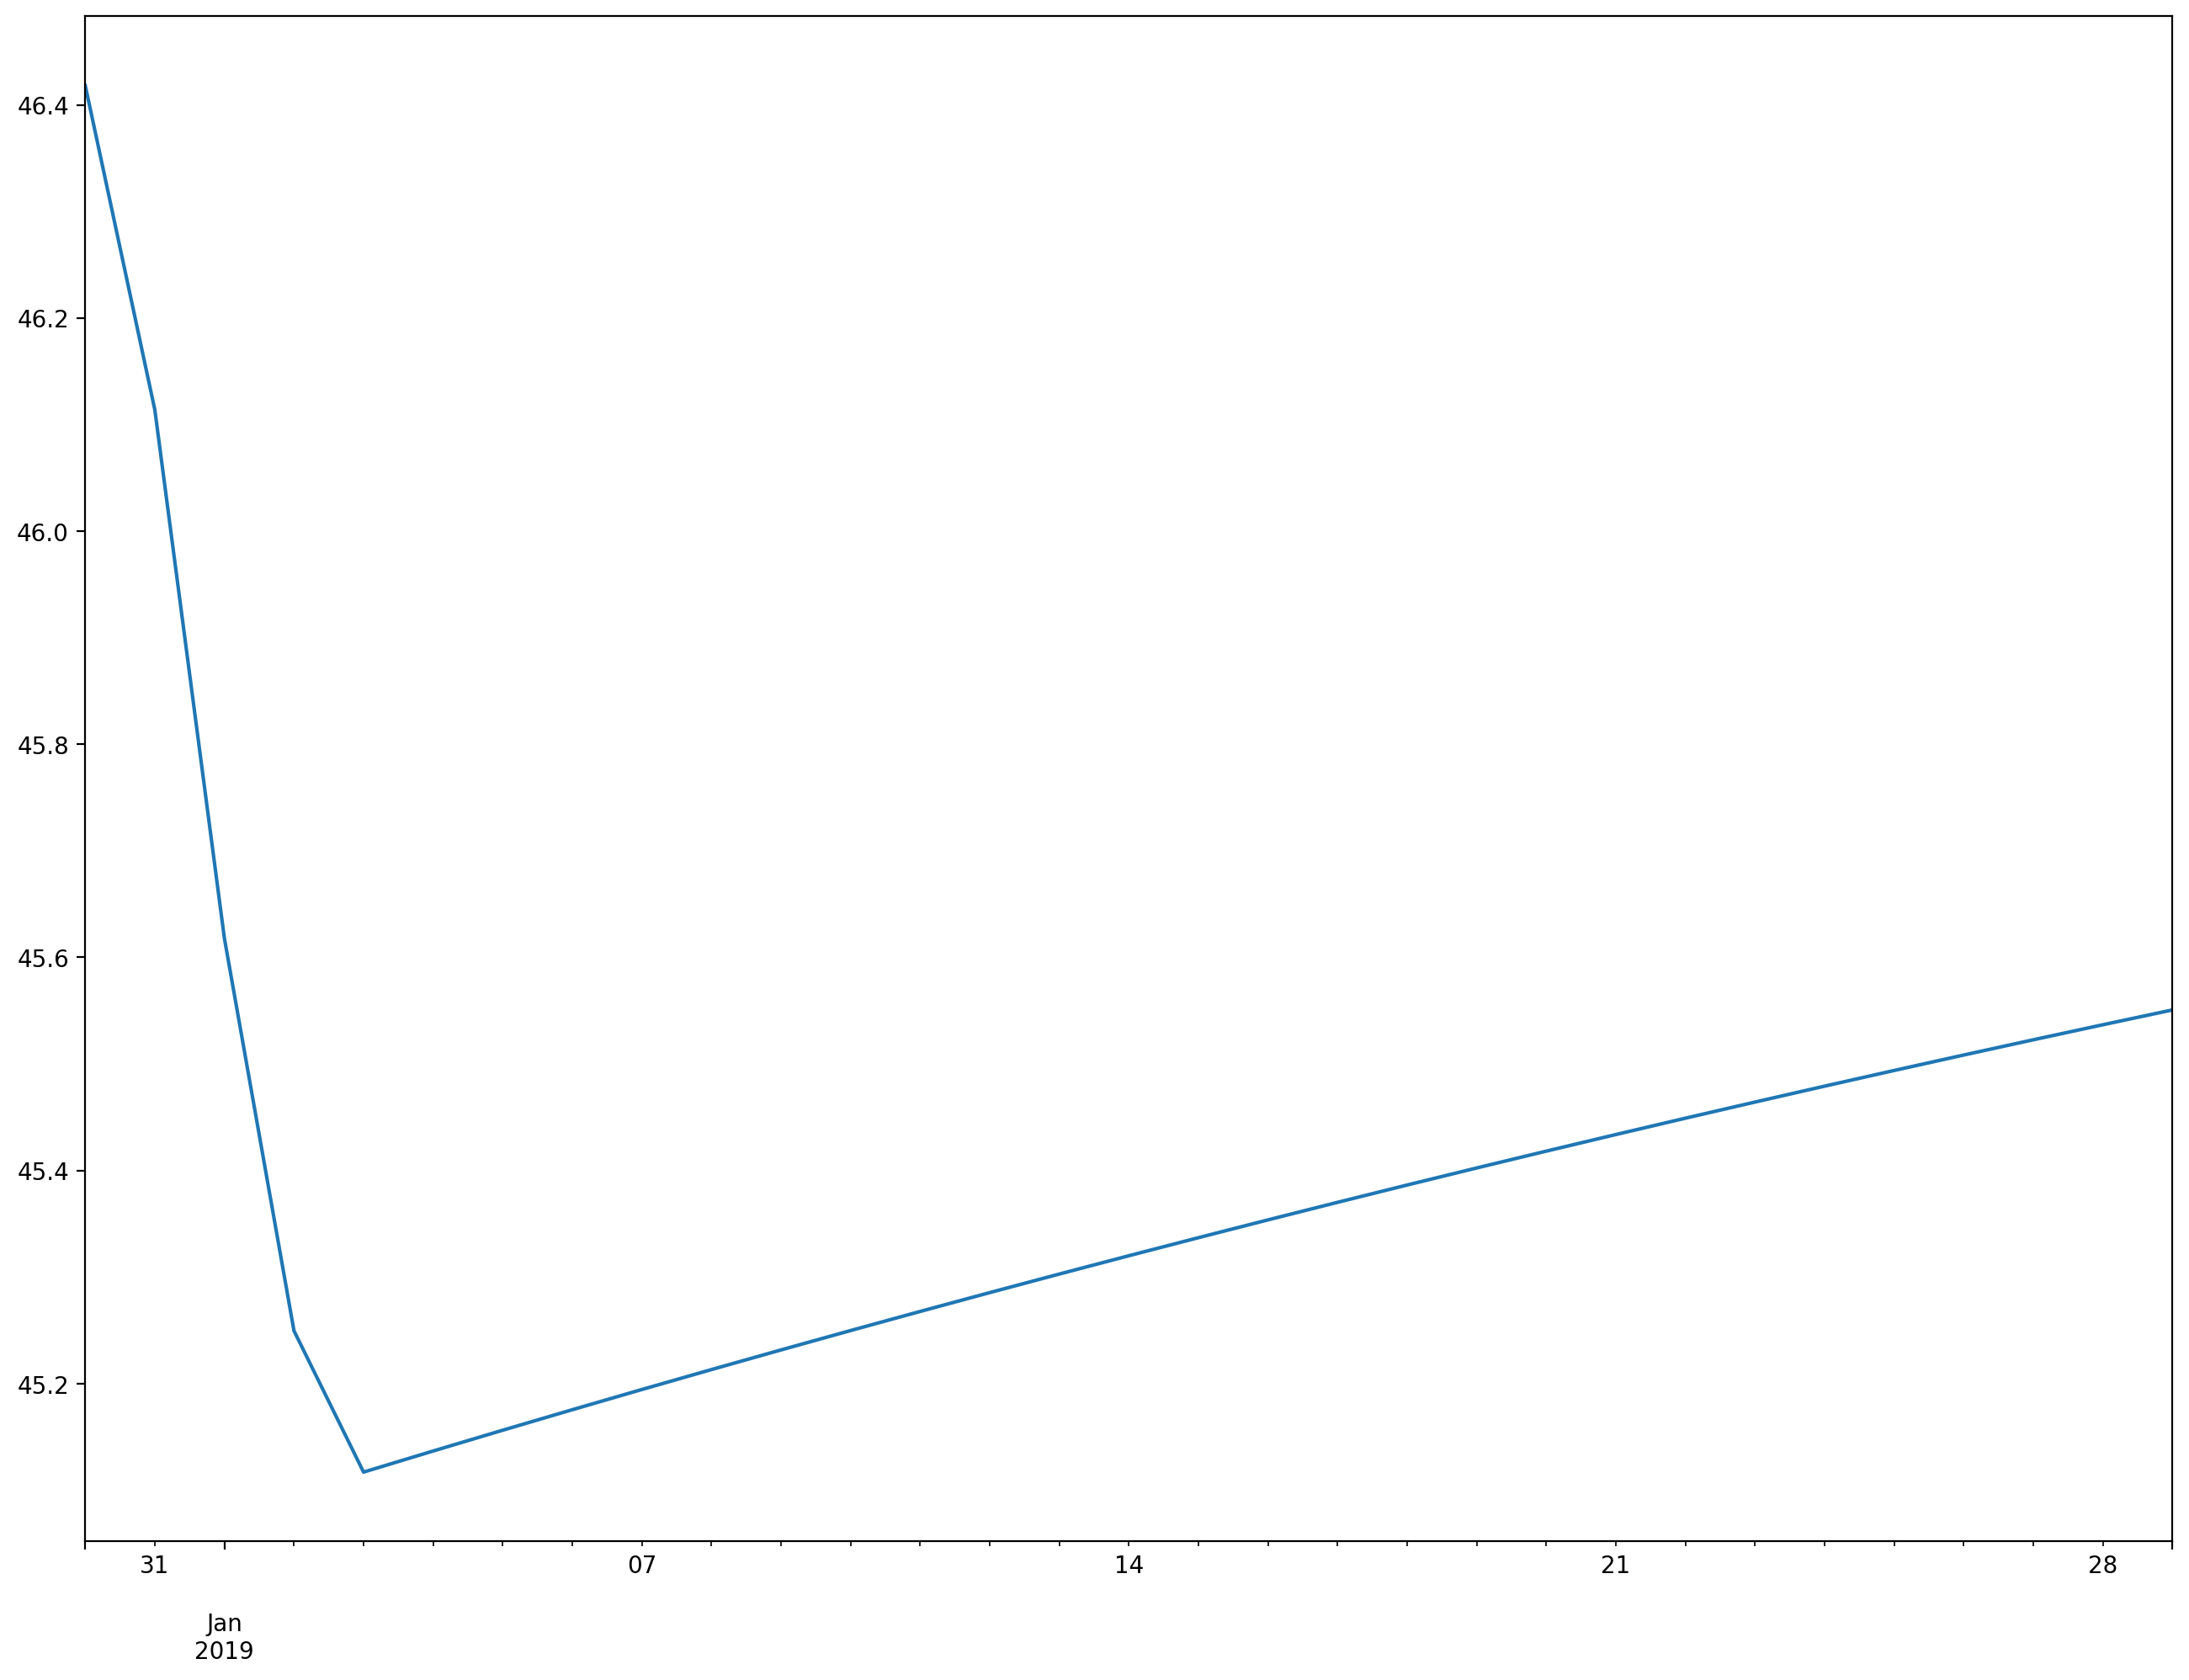

In [31]:
#Predict for future values 
index_future_dates = pd.date_range(start = '2018-12-30', end = '2019-01-29')
pred_future_values = model_all.predict(start = len(df), end = len(df)+30)
pred_future_values.index = index_future_dates
pred_future_values.plot()